# Data Cleaning



In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [178]:
retail=pd.read_csv('C:/Users/SATYAJIT/Downloads/Online+Retail.csv', sep=",", encoding="ISO-8859-1", header=0)

In [179]:
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [180]:
retail.shape

(541909, 8)

In [181]:
retail.info() #to read basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [182]:
retail.isnull().sum()  #to find out all columns having total missing data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [183]:
retail.isnull().all

<bound method DataFrame.all of         InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  

In [184]:
round(100*(retail.isnull().sum())/len(retail),2) #denoting the missing data as percentages

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [185]:
# drop all rows having missing values
retail=retail.dropna()
retail.shape

(406829, 8)

# Data Preparation

- Recency -how recently a vustomer buys items.
- frequency -how frequently a customer buys items.
- monetary -how much does the customer spend.

In [186]:
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [187]:
# new column total amount=quantity * unitprice

retail["Amount"]=retail['Quantity']*retail['UnitPrice']

In [188]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [189]:
# creating the monetary column
group_df=retail.groupby('CustomerID')['Amount'].sum()
group_df=group_df.reset_index()
group_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [190]:
# frequency
frequency = retail.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','Frequency']
frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [191]:
# merge frequency and monetary dataframe

group_df=pd.merge(group_df, frequency, on='CustomerID', how='inner')
group_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [192]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [193]:
# changing the date format to pandas recognisable
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')


In [194]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [195]:
#finding maximum date

max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [196]:
#difference of each transaction an max_date

retail['Difference']=max_date-retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [197]:
#recency

recency=retail.groupby('CustomerID')['Difference'].min()
recency=recency.reset_index()

recency

,CustomerID,Difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [198]:
# merge frequency, monetary and recency dataframe

group_df=pd.merge(group_df, recency, on='CustomerID', how='inner')
group_df.columns=['CustomerID','Monetary','Frequency','Recency']
group_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [199]:
group_df['Recency']=group_df['Recency'].dt.days    # only number of days

In [200]:
group_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x1c43a1f7148>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43a27d788>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43a27df08>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43a27a948>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42c801fc8>],
 'means': []}

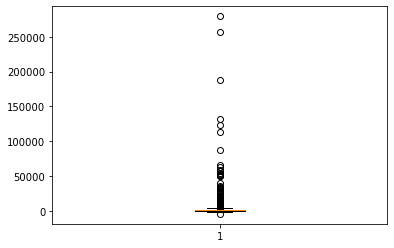

In [201]:
# outlier treatment
plt.boxplot(group_df['Monetary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4413ce388>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4413c2ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4413bdfc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4413c8c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4413c8d48>],
 'means': []}

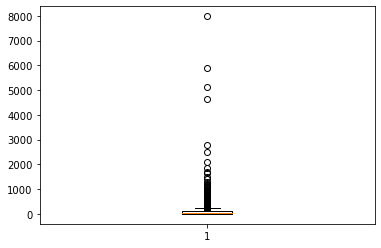

In [202]:
plt.boxplot(group_df['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c43d4cc808>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43d4edd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43d4ed548>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43d4f3b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c43d4f9e88>],
 'means': []}

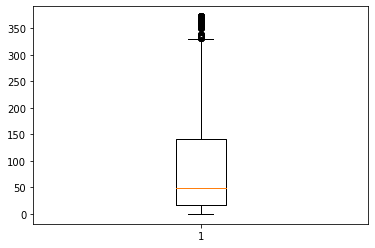

In [203]:
plt.boxplot(group_df['Recency'])

In [204]:
# removing (statistical) outliers
Q1 = group_df.Monetary.quantile(0.05)
Q3 = group_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.Monetary >= Q1 - 1.5*IQR) & (group_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = group_df.Recency.quantile(0.05)
Q3 = group_df.Recency.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.Recency >= Q1 - 1.5*IQR) & (group_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = group_df.Frequency.quantile(0.05)
Q3 = group_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.Frequency >= Q1 - 1.5*IQR) & (group_df.Frequency <= Q3 + 1.5*IQR)]


In [205]:
# feature rescaling

rfm_df=group_df[['Monetary','Frequency','Recency']]
rfm_df.head()

,Monetary,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [206]:
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [207]:
# conbert from array to dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']

In [208]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# hopkins statistics

In [209]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(rfm_df_scaled)

0.9584990157371134

In [210]:
# the data distribution has a high tendency to cluster

# Modelling

In [211]:
from sklearn.cluster import KMeans


In [212]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [213]:
# choose arbitrary value of K and make initial clusters in Kmeans
kmean=KMeans(n_clusters=4,max_iter=50)
kmean.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [214]:
kmean.labels_

array([2, 1, 0, ..., 2, 0, 0])

# deciding optimal number of clusters

In [215]:
# METHOD-1 elbow curve(sum of squared distances(SSD))

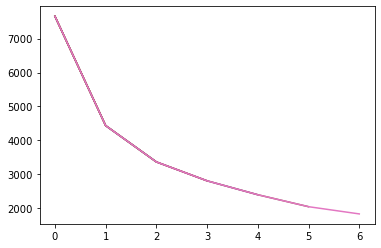

In [216]:
range_n_clusters=[2,3,4,5,6,7,8]
ssd=[]
for num_cluster in range_n_clusters:
    kmean=KMeans(n_clusters=num_cluster,max_iter=50)
    kmean.fit(rfm_df_scaled)
    
    ssd.append(kmean.inertia_)
    
    #plot the ssd for each n clusters
    plt.plot(ssd)

In [217]:
ssd #for 2,3,4,5,6,7,8 clusters separately

[7661.683092517178,
 4433.58061930211,
 3360.513930286802,
 2802.956169337601,
 2392.033963002571,
 2039.2724831706275,
 1826.066994200416]

In [218]:
# METHOD-2 silhoute score to determine optimal number of clusters

In [219]:
from sklearn.metrics import silhouette_score

In [220]:
range_n_clusters=[2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    #iniytialise kameans
    kmean=KMeans(n_clusters=num_clusters,max_iter=50)
    kmean.fit(rfm_df_scaled)
    
    cluster_labels=kmean.labels_
        
    #compute silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled,cluster_labels)
    print('for n clusters={0},the silhouette score is {1}'.format(num_clusters,silhouette_avg))
    

for n clusters=2,the silhouette score is 0.5415858652525395
for n clusters=3,the silhouette score is 0.5084896296141937
for n clusters=4,the silhouette score is 0.4797989553487543
for n clusters=5,the silhouette score is 0.4662700564189704
for n clusters=6,the silhouette score is 0.4169897163641209
for n clusters=7,the silhouette score is 0.41768907282021733
for n clusters=8,the silhouette score is 0.4096086101104641


In [221]:
# this gives us a layman idea for how many clusters are mathematically optimal

In [222]:
# taking into vonsideration elbow curve and SA lest take k=3.

# K_Means cluster model with k=3

In [223]:
#creating k=3 clusters

kmean=KMeans(n_clusters=3,max_iter=50)
kmean.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [224]:
kmean.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [225]:
# assign labels to customerID

In [226]:
group_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [227]:
group_df['clusterID']=kmean.labels_

In [228]:
group_df.head()

,CustomerID,Monetary,Frequency,Recency,clusterID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<AxesSubplot:xlabel='clusterID', ylabel='Monetary'>

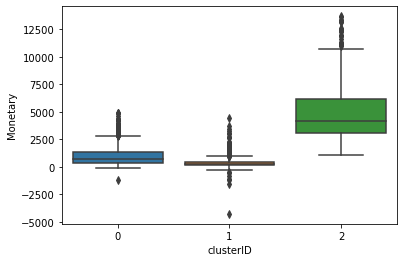

In [229]:
sns.boxplot(x='clusterID',y='Monetary',data=group_df)

<AxesSubplot:xlabel='clusterID', ylabel='Recency'>

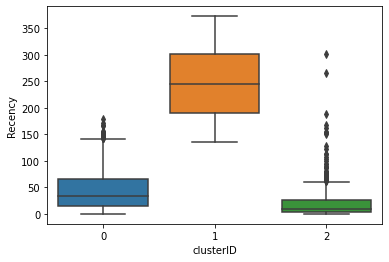

In [230]:
sns.boxplot(x='clusterID',y='Recency',data=group_df)

<AxesSubplot:xlabel='clusterID', ylabel='Frequency'>

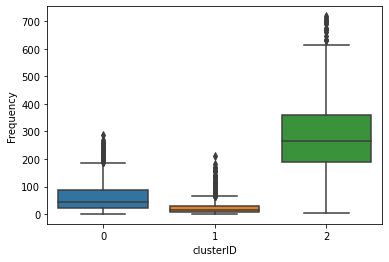

In [231]:
sns.boxplot(x='clusterID',y='Frequency',data=group_df)

# Hierarchical clustering

In [232]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [233]:
rfm_df_scaled

,Monetary,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


In [234]:
group_df.head()

,CustomerID,Monetary,Frequency,Recency,clusterID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


In [235]:
# Single Linkage

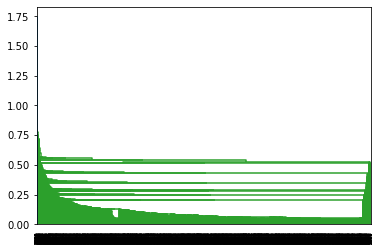

In [239]:
merging = linkage(rfm_df_scaled,method='single',metric='euclidean')
dendrogram(merging)
plt.show()

In [240]:
#complete Linkage

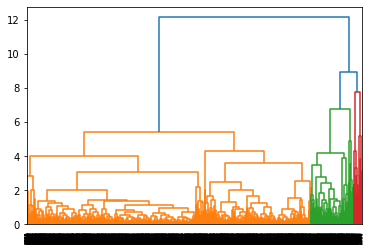

In [242]:
merging = linkage(rfm_df_scaled,method='complete',metric='euclidean')
dendrogram(merging)
plt.show()

In [243]:
cut_tree(merging,n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [244]:
cut_tree(merging,n_clusters=3).shape

(4293, 1)

In [247]:
cluster_labels=cut_tree(merging,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [248]:
group_df['cluster_labels']=cluster_labels


In [249]:
group_df.head()

,CustomerID,Monetary,Frequency,Recency,clusterID,cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<AxesSubplot:xlabel='cluster_labels', ylabel='Monetary'>

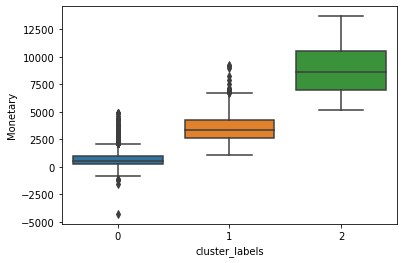

In [250]:
sns.boxplot(x='cluster_labels',y='Monetary',data=group_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='Frequency'>

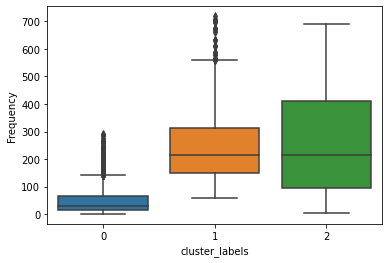

In [251]:
sns.boxplot(x='cluster_labels',y='Frequency',data=group_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='Recency'>

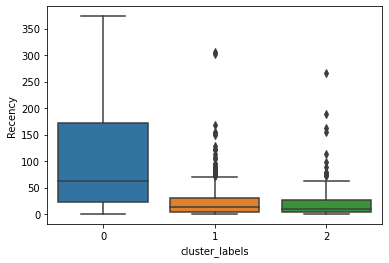

In [252]:
sns.boxplot(x='cluster_labels',y='Recency',data=group_df)